# Compare and study influence of representation, parameter and learning method 
with scikit-learn and nltk


## Possibilities

(at least 3 methods) choices on this task

### text representations
text to vertor of numbers

- bag of words
- word2vec http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/ https://radimrehurek.com/gensim/models/word2vec.html

### learning methods/algorithms
classify vectors of numbers

- random forest
- KNN
- neural network


In [1]:
from plot_confusion_matrix import plot_confusion_matrix
from sklearn import metrics

def compute_model_perf(cont, truth, pred, name="unnamed", fit_dur=None, predict_dur=None):
    tmp = {
        'fit_duration': fit_dur,
        'predict_duration': predict_dur,
        'accuracy': metrics.accuracy_score(truth, pred),
        'recall': metrics.recall_score(truth, pred)}
    cont[name]=tmp
    return tmp


import pylab as plot
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plot.rcParams.update(params)

## Datasets

### polarity

review -> positive/negative rating

In [2]:
from glob import glob
polarity_files = glob("data/review_polarity/txt_sentoken/*/*")
polarity_files_pos = glob("data/review_polarity/txt_sentoken/pos/*")
polarity_files_neg = glob("data/review_polarity/txt_sentoken/neg/*")
print("number of positives: ", len(polarity_files_pos))
print("number of negatives: ", len(polarity_files_neg))

number of positives:  1000
number of negatives:  1000


In [3]:
import pandas as pd
polarity_files_df = pd.DataFrame({'pos':polarity_files_pos,'neg':polarity_files_neg})
polarity_files_df = pd.melt(polarity_files_df, value_vars=['pos','neg'],value_name="file",var_name="label")
polarity_files_df["label_num"] = polarity_files_df.label.map({"neg":0, "pos":1})
polarity_files_df.sample(10)

,label,file,label_num
1207,neg,data/review_polarity/txt_sentoken/neg/cv200_29...,0
1724,neg,data/review_polarity/txt_sentoken/neg/cv730_10...,0
633,pos,data/review_polarity/txt_sentoken/pos/cv634_11...,1
718,pos,data/review_polarity/txt_sentoken/pos/cv724_13...,1
393,pos,data/review_polarity/txt_sentoken/pos/cv397_29...,1
1467,neg,data/review_polarity/txt_sentoken/neg/cv475_22...,0
661,pos,data/review_polarity/txt_sentoken/pos/cv663_13...,1
1209,neg,data/review_polarity/txt_sentoken/neg/cv202_11...,0
1512,neg,data/review_polarity/txt_sentoken/neg/cv523_18...,0
396,pos,data/review_polarity/txt_sentoken/pos/cv400_19...,1


In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
sample = polarity_files_df #.sample(200)
polarity_X = np.array([open(e).read() for e in sample["file"]])
polarity_Y = sample["label_num"]
polarity_train_X, polarity_test_X, polarity_train_Y, polarity_test_Y = train_test_split(polarity_X, polarity_Y, random_state=1)

#### sklearn - CountVectorizer

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(polarity_train_X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [6]:
# examine the fitted vocabulary
vect.get_feature_names()[:20]

['00',
 '000',
 '0009f',
 '007',
 '00s',
 '03',
 '04',
 '05',
 '05425',
 '10',
 '100',
 '1000',
 '10000',
 '100m',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106']

In [7]:
# transform training data into a "document-term matrix'
polarity_train_dtm = vect.transform(polarity_train_X)
polarity_train_dtm

<1500x35363 sparse matrix of type '<class 'numpy.int64'>'
	with 500561 stored elements in Compressed Sparse Row format>

In [8]:
# transform training data into a "document-term matrix'
polarity_test_dtm = vect.transform(polarity_test_X)
polarity_test_dtm

<500x35363 sparse matrix of type '<class 'numpy.int64'>'
	with 161480 stored elements in Compressed Sparse Row format>

In [9]:
# convert sparse matrix to a dense matrix
polarity_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(polarity_train_dtm.toarray(), columns=vect.get_feature_names()).sample(10)

,00,000,0009f,007,00s,03,04,05,05425,10,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
1336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
polarity_mperf_accu_cv = {}

#### sklearn - MultinomialNB using CountVectorizer

In [223]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
name = "MultinomialNB"
nb = MultinomialNB()

In [224]:
print(nb.__doc__)


    Naive Bayes classifier for multinomial models

    The multinomial Naive Bayes classifier is suitable for classification with
    discrete features (e.g., word counts for text classification). The
    multinomial distribution normally requires integer feature counts. However,
    in practice, fractional counts such as tf-idf may also work.

    Read more in the :ref:`User Guide <multinomial_naive_bayes>`.

    Parameters
    ----------
    alpha : float, optional (default=1.0)
        Additive (Laplace/Lidstone) smoothing parameter
        (0 for no smoothing).

    fit_prior : boolean, optional (default=True)
        Whether to learn class prior probabilities or not.
        If false, a uniform prior will be used.

    class_prior : array-like, size (n_classes,), optional (default=None)
        Prior probabilities of the classes. If specified the priors are not
        adjusted according to the data.

    Attributes
    ----------
    class_log_prior_ : array, shape (n_classes, )

In [13]:
result = %timeit -r 1 -n 1 -o nb.fit(polarity_train_dtm, polarity_train_Y)
fit_dur=result.average

7.88 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [14]:
result = %timeit -r 1 -n 1 -o nb.predict(polarity_test_dtm)
predict_dur=result.average
y_pred_class = nb.predict(polarity_test_dtm)
y_pred_class

1.78 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,

In [15]:
# tranformation into a boolean array
print(y_pred_class==1)

[ True False False  True False False  True  True False False False False
  True False  True False  True  True  True False  True False False  True
  True  True False  True  True  True False False False  True  True  True
  True False  True False  True  True False False False False  True False
 False False False False  True False  True  True  True False False False
  True  True False False False  True False  True  True False False False
 False False False False False False False False  True  True False  True
  True  True  True  True False False False False False False False  True
 False  True  True  True False False False  True  True False False False
  True False  True  True False False False False  True False False False
  True False False False  True False False False False  True False  True
  True  True  True  True  True  True  True  True  True False False False
  True False  True False  True False  True False False False  True False
 False  True  True  True False False  True  True Fa

In [16]:
# some film predicted as good
pd.DataFrame(polarity_test_X[y_pred_class==1]).sample(20)

,0
7,"i have never been a "" star trek "" fan , and , ..."
39,when _star wars_ came out some twenty years ag...
80,it stands as a moment one will not soon forget...
74,the dream team is a thoroughly entertaining co...
119,this is a good year if you want plenty of sci-...
128,oh god how many john grisham lawyer films we h...
72,there are certain people in the world who have...
163,although many people have compared this new ga...
19,"for this review and more , visit clear illusio..."
86,curdled is a deliciously dark and witty black ...


In [17]:
compute_model_perf(polarity_mperf_accu_cv,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 0.007883319000001165,
 'predict_duration': 0.0017828899999869918,
 'accuracy': 0.81,
 'recall': 0.796078431372549}

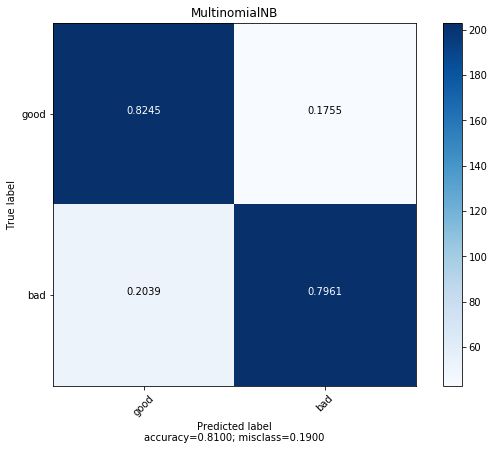

In [18]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - Perceptron using CountVectorizer

In [221]:
from sklearn.linear_model import Perceptron
name = "Perceptron"
nb = Perceptron(tol=1e-3)

In [222]:
print(nb.__doc__)

Perceptron

    Read more in the :ref:`User Guide <perceptron>`.

    Parameters
    ----------

    penalty : None, 'l2' or 'l1' or 'elasticnet'
        The penalty (aka regularization term) to be used. Defaults to None.

    alpha : float
        Constant that multiplies the regularization term if regularization is
        used. Defaults to 0.0001

    fit_intercept : bool
        Whether the intercept should be estimated or not. If False, the
        data is assumed to be already centered. Defaults to True.

    max_iter : int, optional
        The maximum number of passes over the training data (aka epochs).
        It only impacts the behavior in the ``fit`` method, and not the
        `partial_fit`.
        Defaults to 5. Defaults to 1000 from 0.21, or if tol is not None.

        .. versionadded:: 0.19

    tol : float or None, optional
        The stopping criterion. If it is not None, the iterations will stop
        when (loss > previous_loss - tol). Defaults to None.
       

In [20]:
result = %timeit -r 1 -n 1 -o nb.fit(polarity_train_dtm, polarity_train_Y)
fit_dur=result.average

30 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [21]:
result = %timeit -r 1 -n 1 -o nb.predict(polarity_test_dtm)
y_pred_class = nb.predict(polarity_test_dtm)
predict_dur=result.average

1.24 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [22]:
compute_model_perf(polarity_mperf_accu_cv,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 0.02996558499998514,
 'predict_duration': 0.001244726999999557,
 'accuracy': 0.832,
 'recall': 0.9372549019607843}

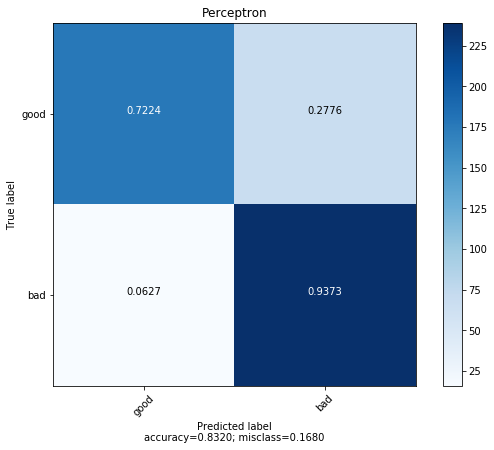

In [23]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - Random Forest using CountVectorizer

In [219]:
from sklearn.ensemble import RandomForestClassifier
name = "RandomForestClassifier"
nb = RandomForestClassifier(max_depth=20, n_estimators=20, max_features="auto")

In [220]:
print(nb.__doc__)

A random forest classifier.

    A random forest is a meta estimator that fits a number of decision tree
    classifiers on various sub-samples of the dataset and uses averaging to
    improve the predictive accuracy and control over-fitting.
    The sub-sample size is always the same as the original
    input sample size but the samples are drawn with replacement if
    `bootstrap=True` (default).

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : integer, optional (default=10)
        The number of trees in the forest.

        .. versionchanged:: 0.20
           The default value of ``n_estimators`` will change from 10 in
           version 0.20 to 100 in version 0.22.

    criterion : string, optional (default="gini")
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "entropy" for the information gain.
        Note: this parameter is tree-specific.

    max_depth :

In [25]:
result = %timeit -r 1 -n 1 -o nb.fit(polarity_train_dtm, polarity_train_Y)
fit_dur=result.average

132 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [26]:
result = %timeit -r 1 -n 1 -o nb.predict(polarity_test_dtm)
y_pred_class = nb.predict(polarity_test_dtm)
predict_dur=result.average

18.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [27]:
compute_model_perf(polarity_mperf_accu_cv,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 0.13237941600002046,
 'predict_duration': 0.018701948000000357,
 'accuracy': 0.754,
 'recall': 0.7176470588235294}

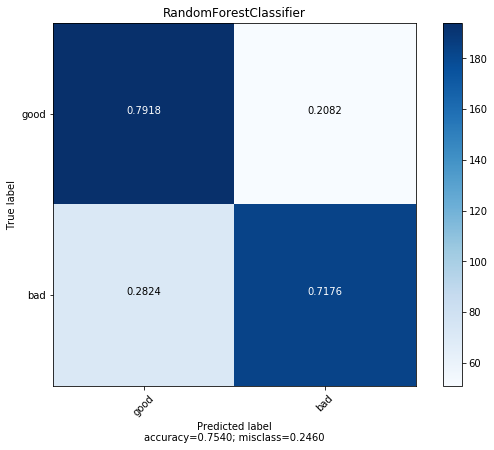

In [28]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - AdaBoost using CountVectorizer

In [29]:
from sklearn.ensemble import AdaBoostClassifier
name = "AdaBoostClassifier"
nb = AdaBoostClassifier()

In [30]:
result = %timeit -r 1 -n 1 -o nb.fit(polarity_train_dtm, polarity_train_Y)
fit_dur=result.average

1.14 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [31]:
result = %timeit -r 1 -n 1 -o nb.predict(polarity_test_dtm)
y_pred_class = nb.predict(polarity_test_dtm)
predict_dur=result.average

44.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [32]:
compute_model_perf(polarity_mperf_accu_cv,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 1.142169406999983,
 'predict_duration': 0.04473128600000109,
 'accuracy': 0.782,
 'recall': 0.792156862745098}

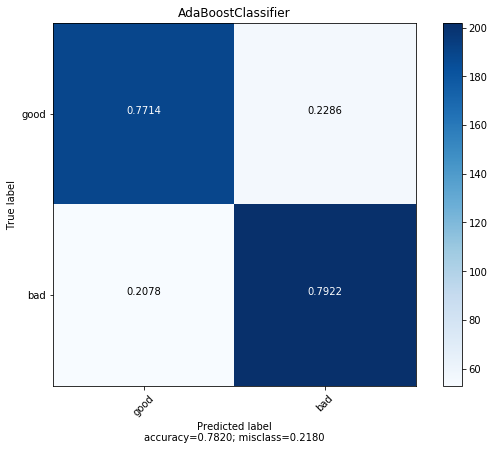

In [33]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - Linear SVM using CountVectorizer

In [209]:
from sklearn.svm import SVC
name = "LinearSVM"
nb = SVC(kernel="linear", C=0.025)

In [218]:
print(nb.__doc__)

C-Support Vector Classification.

    The implementation is based on libsvm. The fit time complexity
    is more than quadratic with the number of samples which makes it hard
    to scale to dataset with more than a couple of 10000 samples.

    The multiclass support is handled according to a one-vs-one scheme.

    For details on the precise mathematical formulation of the provided
    kernel functions and how `gamma`, `coef0` and `degree` affect each
    other, see the corresponding section in the narrative documentation:
    :ref:`svm_kernels`.

    Read more in the :ref:`User Guide <svm_classification>`.

    Parameters
    ----------
    C : float, optional (default=1.0)
        Penalty parameter C of the error term.

    kernel : string, optional (default='rbf')
        Specifies the kernel type to be used in the algorithm.
        It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
        a callable.
        If none is given, 'rbf' will be used. If a callabl

In [205]:
result = %timeit -r 1 -n 1 -o nb.fit(polarity_train_dtm, polarity_train_Y)
fit_dur=result.average

5.24 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [206]:
result = %timeit -r 1 -n 1 -o nb.predict(polarity_test_dtm)
y_pred_class = nb.predict(polarity_test_dtm)
predict_dur=result.average

1.18 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [207]:
# calculate accuracy of class predictions
from sklearn import metrics
compute_model_perf(polarity_mperf_accu_cv,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 5.238058186999751,
 'predict_duration': 1.175372581999909,
 'accuracy': 0.844,
 'recall': 0.8274509803921568}

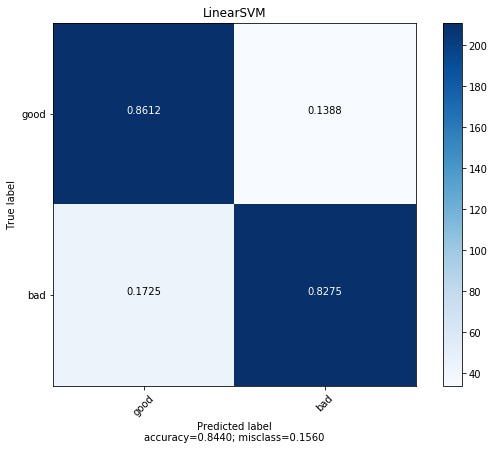

In [208]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - RBF SVM using CountVectorizer

In [227]:
from sklearn.svm import SVC
name = "SVM"
nb = SVC(gamma=5, C=3)
# http://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [228]:
print(nb.__doc__)

C-Support Vector Classification.

    The implementation is based on libsvm. The fit time complexity
    is more than quadratic with the number of samples which makes it hard
    to scale to dataset with more than a couple of 10000 samples.

    The multiclass support is handled according to a one-vs-one scheme.

    For details on the precise mathematical formulation of the provided
    kernel functions and how `gamma`, `coef0` and `degree` affect each
    other, see the corresponding section in the narrative documentation:
    :ref:`svm_kernels`.

    Read more in the :ref:`User Guide <svm_classification>`.

    Parameters
    ----------
    C : float, optional (default=1.0)
        Penalty parameter C of the error term.

    kernel : string, optional (default='rbf')
        Specifies the kernel type to be used in the algorithm.
        It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
        a callable.
        If none is given, 'rbf' will be used. If a callabl

In [200]:
result = %timeit -r 1 -n 1 -o nb.fit(polarity_train_dtm, polarity_train_Y)
fit_dur=result.average

6.28 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [201]:
result = %timeit -r 1 -n 1 -o nb.predict(polarity_test_dtm)
y_pred_class = nb.predict(polarity_test_dtm)
predict_dur=result.average

1.99 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [202]:
# calculate accuracy of class predictions
from sklearn import metrics
compute_model_perf(polarity_mperf_accu_cv,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 6.28115175999983,
 'predict_duration': 1.9860186910000266,
 'accuracy': 0.49,
 'recall': 0.0}

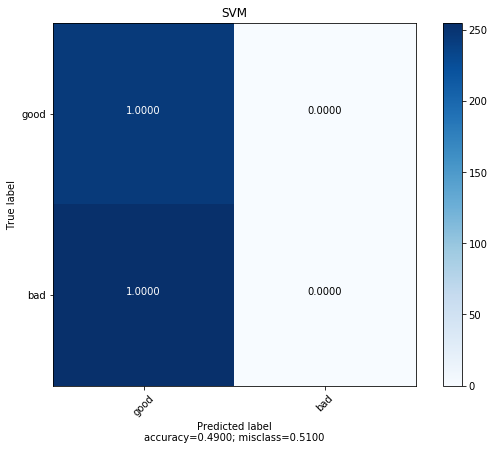

In [203]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - KNN using CountVectorizer

In [229]:
from sklearn.neighbors import KNeighborsClassifier
name = "KNN"
nb = KNeighborsClassifier(5)

In [230]:
print(nb.__doc__)
# http://scikit-learn.org/stable/modules/neighbors.html#classification

Classifier implementing the k-nearest neighbors vote.

    Read more in the :ref:`User Guide <classification>`.

    Parameters
    ----------
    n_neighbors : int, optional (default = 5)
        Number of neighbors to use by default for :meth:`kneighbors` queries.

    weights : str or callable, optional (default = 'uniform')
        weight function used in prediction.  Possible values:

        - 'uniform' : uniform weights.  All points in each neighborhood
          are weighted equally.
        - 'distance' : weight points by the inverse of their distance.
          in this case, closer neighbors of a query point will have a
          greater influence than neighbors which are further away.
        - [callable] : a user-defined function which accepts an
          array of distances, and returns an array of the same shape
          containing the weights.

    algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, optional
        Algorithm used to compute the nearest neighbors:

 

In [45]:
result = %timeit -r 1 -n 1 -o nb.fit(polarity_train_dtm, polarity_train_Y)
fit_dur=result.average

2.84 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [46]:
result = %timeit -r 1 -n 1 -o nb.predict(polarity_test_dtm)
y_pred_class = nb.predict(polarity_test_dtm)
predict_dur=result.average

194 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [47]:
# calculate accuracy of class predictions
from sklearn import metrics
compute_model_perf(polarity_mperf_accu_cv,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 0.0028357639999967432,
 'predict_duration': 0.1936632659999873,
 'accuracy': 0.63,
 'recall': 0.611764705882353}

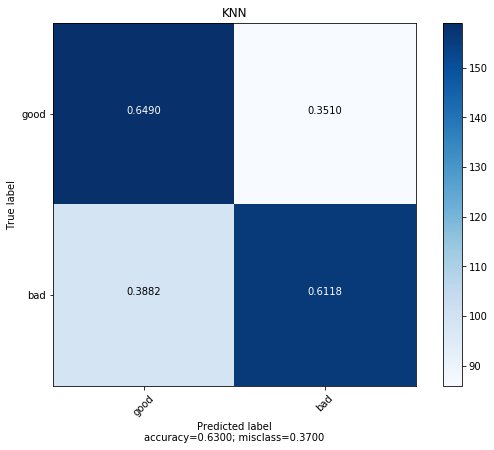

In [48]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - NN using CountVectorizer

In [233]:
from sklearn.neural_network import MLPClassifier
name = "NN"
nb = MLPClassifier(alpha=1,learning_rate='adaptive')

In [234]:
print(nb.__doc__)

Multi-layer Perceptron classifier.

    This model optimizes the log-loss function using LBFGS or stochastic
    gradient descent.

    .. versionadded:: 0.18

    Parameters
    ----------
    hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
        The ith element represents the number of neurons in the ith
        hidden layer.

    activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
        Activation function for the hidden layer.

        - 'identity', no-op activation, useful to implement linear bottleneck,
          returns f(x) = x

        - 'logistic', the logistic sigmoid function,
          returns f(x) = 1 / (1 + exp(-x)).

        - 'tanh', the hyperbolic tan function,
          returns f(x) = tanh(x).

        - 'relu', the rectified linear unit function,
          returns f(x) = max(0, x)

    solver : {'lbfgs', 'sgd', 'adam'}, default 'adam'
        The solver for weight optimization.

        - 'lbfgs' is an optimizer in the family 

In [235]:
result = %timeit -r 1 -n 1 -o nb.fit(polarity_train_dtm, polarity_train_Y)
fit_dur=result.average

1min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [236]:
result = %timeit -r 1 -n 1 -o nb.predict(polarity_test_dtm)
y_pred_class = nb.predict(polarity_test_dtm)
predict_dur=result.average

36.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [237]:
# calculate accuracy of class predictions
from sklearn import metrics
compute_model_perf(polarity_mperf_accu_cv,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 86.68555009899956,
 'predict_duration': 0.03633681300016178,
 'accuracy': 0.844,
 'recall': 0.8470588235294118}

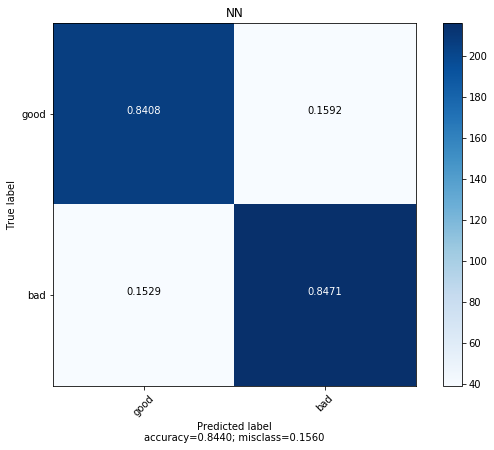

In [238]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

####  sklearn Logisitic Regression using CountVectorizer

In [243]:
# import and instantiate a logistic regression model 
from sklearn.linear_model import LogisticRegression
name = "LogisticRegression"
logreg = LogisticRegression()

In [244]:
print(nb.__doc__)

Multi-layer Perceptron classifier.

    This model optimizes the log-loss function using LBFGS or stochastic
    gradient descent.

    .. versionadded:: 0.18

    Parameters
    ----------
    hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
        The ith element represents the number of neurons in the ith
        hidden layer.

    activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
        Activation function for the hidden layer.

        - 'identity', no-op activation, useful to implement linear bottleneck,
          returns f(x) = x

        - 'logistic', the logistic sigmoid function,
          returns f(x) = 1 / (1 + exp(-x)).

        - 'tanh', the hyperbolic tan function,
          returns f(x) = tanh(x).

        - 'relu', the rectified linear unit function,
          returns f(x) = max(0, x)

    solver : {'lbfgs', 'sgd', 'adam'}, default 'adam'
        The solver for weight optimization.

        - 'lbfgs' is an optimizer in the family 

In [245]:
result = %timeit -r 1 -n 1 -o logreg.fit(polarity_train_dtm, polarity_train_Y)
fit_dur=result.average

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


383 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [246]:
result = %timeit -r 1 -n 1 -o y_pred_class = logreg.predict(polarity_test_dtm)
predict_dur=result.average

1.66 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [247]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(polarity_test_dtm)[:, 1]
y_pred_prob

array([9.99970911e-01, 3.67974916e-02, 1.42223380e-02, 6.72115169e-05,
       3.07171731e-01, 1.39045514e-02, 9.92254245e-01, 4.37335095e-01,
       1.61400634e-02, 9.60968813e-01, 2.08208332e-01, 1.17965356e-01,
       6.18423630e-01, 1.68714588e-04, 9.97893977e-01, 5.84498830e-01,
       9.57262067e-01, 4.24748132e-02, 7.82725139e-01, 1.79191980e-04,
       9.98910932e-01, 3.15910512e-01, 1.63339948e-01, 9.90426624e-01,
       9.98917585e-01, 9.99129109e-01, 1.51064173e-03, 9.99936973e-01,
       9.96450633e-01, 2.80188472e-01, 1.96188950e-03, 9.99901585e-01,
       4.00933940e-04, 9.99915433e-01, 9.93428424e-01, 9.94652816e-01,
       9.99980111e-01, 1.15967447e-01, 8.46350210e-01, 8.95695229e-02,
       9.99425074e-01, 9.90706373e-01, 2.86345206e-01, 8.07141034e-02,
       7.81713761e-01, 1.88377873e-01, 9.99896499e-01, 2.82580492e-05,
       6.75715014e-04, 6.09468107e-03, 1.54523330e-01, 7.52975955e-02,
       9.98108120e-01, 4.74492207e-01, 9.74575570e-01, 9.99955891e-01,
      

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.80')

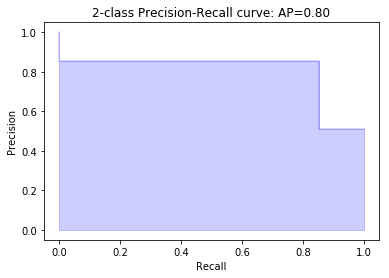

In [58]:
# calculate accuracy
average_precision = metrics.average_precision_score(polarity_test_Y, y_pred_class)
precision, recall, _ = metrics.precision_recall_curve(polarity_test_Y, y_pred_class)
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [59]:
compute_model_perf(polarity_mperf_accu_cv,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 0.39269512200002055,
 'predict_duration': 0.0013861449999978959,
 'accuracy': 0.852,
 'recall': 0.8549019607843137}

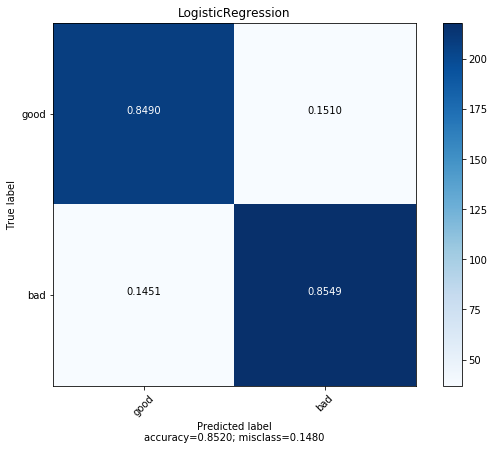

In [60]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

In [61]:
# calculate AUC
metrics.roc_auc_score(polarity_test_Y, y_pred_prob)

0.9332212885154062

#### TF-IDF weighting

From the [scikit-learn documentation](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html):

> Occurrence count is a good start but there is an issue: longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

> To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies.

> Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

> This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

In [62]:
### Computing TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tfidf.fit(polarity_train_dtm)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [63]:
# transform training data into a "document-term matrix'
polarity_IDF_train_dtm = tfidf.transform(polarity_train_dtm)
polarity_IDF_train_dtm

<1500x35363 sparse matrix of type '<class 'numpy.float64'>'
	with 500561 stored elements in Compressed Sparse Row format>

In [64]:
# transform training data into a "document-term matrix'
polarity_IDF_test_dtm = tfidf.transform(polarity_test_dtm)
polarity_IDF_test_dtm

<500x35363 sparse matrix of type '<class 'numpy.float64'>'
	with 161480 stored elements in Compressed Sparse Row format>

In [65]:
polarity_mperf_accu_idf = {}

#### sklearn - MultinomialNB using TF-IDF

In [66]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
name = "MultinomialNB"
nb = MultinomialNB()

In [67]:
result = %timeit -r 1 -n 1 -o nb.fit(polarity_IDF_train_dtm, polarity_train_Y)
fit_dur=result.average

8.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [68]:
result = %timeit -r 1 -n 1 -o nb.predict(polarity_IDF_test_dtm)
y_pred_class = nb.predict(polarity_IDF_test_dtm)
predict_dur=result.average

2.06 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [69]:
# some film predicted as good
pd.DataFrame(polarity_test_X[y_pred_class==1]).sample(20)

,0
115,oh god how many john grisham lawyer films we h...
35,when _star wars_ came out some twenty years ag...
108,"susan granger's review of "" american outlaws ""..."
64,a slight romantic comedy with a feminist bent ...
20,october sky is a rare oddity in cinema : a sel...
201,"call me crazy , but i don't see saving private..."
118,i want to correct what i wrote last year in my...
212,"lauded as a genius by many , stanley kubrick c..."
43,"eric rohmer's "" pauline at the beach , "" is on..."
166,""" the fugitive "" is probably one of the great..."


In [70]:
compute_model_perf(polarity_mperf_accu_idf,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 0.008504790999978695,
 'predict_duration': 0.0020582310000065718,
 'accuracy': 0.804,
 'recall': 0.7294117647058823}

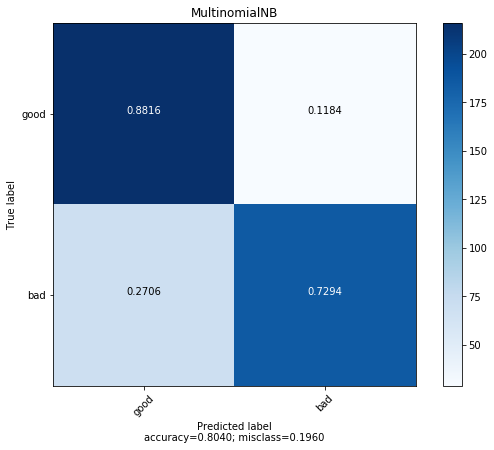

In [71]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - Perceptron using TF-IDF

In [72]:
from sklearn.linear_model import Perceptron
name = "Perceptron"
nb = Perceptron(tol=1e-3)

In [73]:
result = %timeit -r 1 -n 1 -o nb.fit(polarity_IDF_train_dtm, polarity_train_Y)
fit_dur=result.average

17.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [74]:
result = %timeit -r 1 -n 1 -o nb.predict(polarity_test_dtm)
y_pred_class = nb.predict(polarity_IDF_test_dtm)
predict_dur=result.average

1.18 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [75]:
compute_model_perf(polarity_mperf_accu_idf,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 0.017206987000008667,
 'predict_duration': 0.001181029999997918,
 'accuracy': 0.85,
 'recall': 0.8705882352941177}

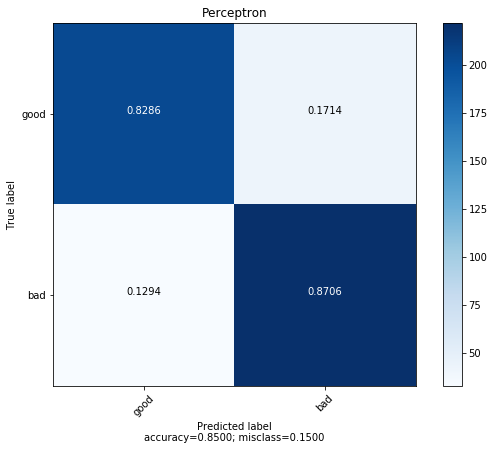

In [76]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - Random Forest using TF-IDF

In [77]:
from sklearn.ensemble import RandomForestClassifier
name = "RandomForestClassifier"
nb = RandomForestClassifier(max_depth=20, n_estimators=20, max_features="auto")

In [78]:
result = %timeit -r 1 -n 1 -o nb.fit(polarity_IDF_train_dtm, polarity_train_Y)
fit_dur=result.average

163 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [79]:
result = %timeit -r 1 -n 1 -o nb.predict(polarity_IDF_test_dtm)
y_pred_class = nb.predict(polarity_IDF_test_dtm)
predict_dur=result.average

23 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [80]:
compute_model_perf(polarity_mperf_accu_idf,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 0.16251366700001313,
 'predict_duration': 0.023040685000012218,
 'accuracy': 0.71,
 'recall': 0.6588235294117647}

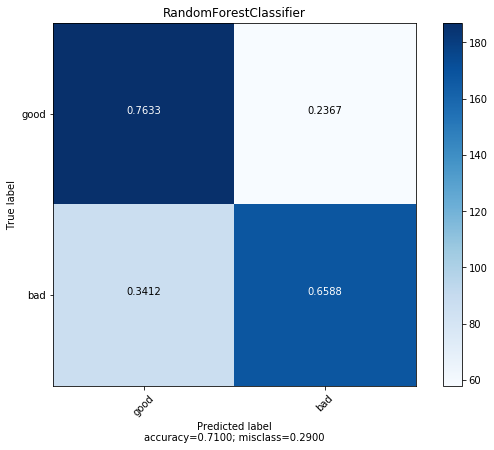

In [81]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - AdaBoost using TF-IDF

In [82]:
from sklearn.ensemble import AdaBoostClassifier
name = "AdaBoostClassifier"
nb = AdaBoostClassifier()

In [83]:
result = %timeit -r 1 -n 1 -o nb.fit(polarity_IDF_train_dtm, polarity_train_Y)
fit_dur=result.average

2.57 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [84]:
result = %timeit -r 1 -n 1 -o nb.predict(polarity_IDF_test_dtm)
y_pred_class = nb.predict(polarity_IDF_test_dtm)
predict_dur=result.average

46.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [85]:
compute_model_perf(polarity_mperf_accu_idf,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 2.5700838409999847,
 'predict_duration': 0.0460617509999679,
 'accuracy': 0.768,
 'recall': 0.7607843137254902}

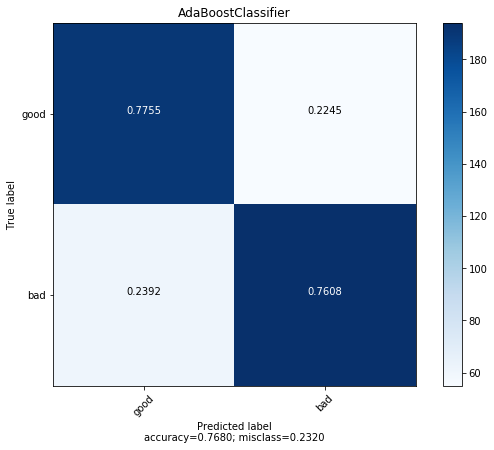

In [86]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - Linear SVM using TF-IDF

In [189]:
from sklearn.svm import SVC
name = "LinearSVM"
nb = SVC(kernel="linear", C=0.025)

In [190]:
result = %timeit -r 1 -n 1 -o nb.fit(polarity_IDF_train_dtm, polarity_train_Y)
fit_dur=result.average

6.32 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [191]:
result = %timeit -r 1 -n 1 -o nb.predict(polarity_IDF_test_dtm)
y_pred_class = nb.predict(polarity_IDF_test_dtm)
predict_dur=result.average

2.17 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [192]:
# calculate accuracy of class predictions
from sklearn import metrics
compute_model_perf(polarity_mperf_accu_idf,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 6.321795851999923,
 'predict_duration': 2.171805698999833,
 'accuracy': 0.49,
 'recall': 0.0}

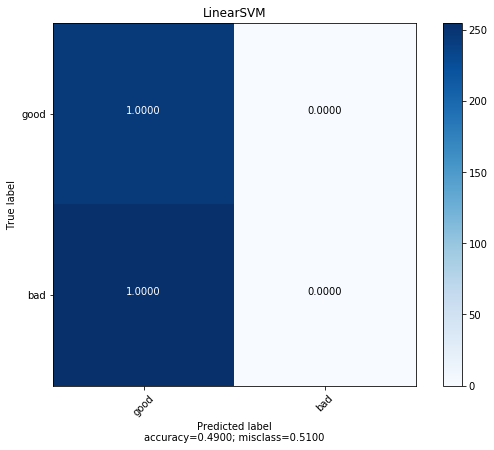

In [193]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - RBF SVM using TF-IDF

In [194]:
from sklearn.svm import SVC
name = "SVM"
nb = SVC(gamma=5, C=3)

In [195]:
result = %timeit -r 1 -n 1 -o nb.fit(polarity_IDF_train_dtm, polarity_train_Y)
fit_dur=result.average

6.63 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [196]:
result = %timeit -r 1 -n 1 -o nb.predict(polarity_IDF_test_dtm)
y_pred_class = nb.predict(polarity_IDF_test_dtm)
predict_dur=result.average

1.99 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [197]:
# calculate accuracy of class predictions
from sklearn import metrics
compute_model_perf(polarity_mperf_accu_idf,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 6.6319640330002585,
 'predict_duration': 1.986473190000197,
 'accuracy': 0.694,
 'recall': 0.5372549019607843}

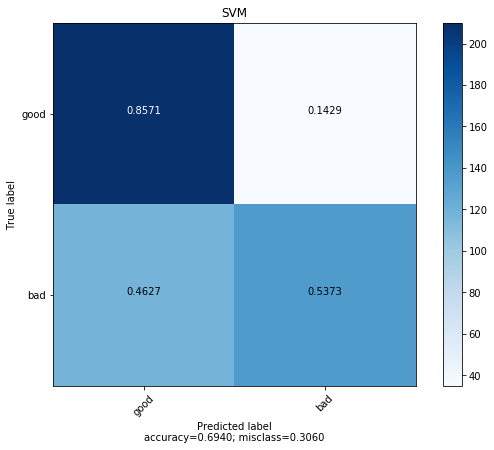

In [198]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - KNN using TF-IDF

In [97]:
from sklearn.neighbors import KNeighborsClassifier
name = "KNN"
nb = KNeighborsClassifier(5)

In [98]:
result = %timeit -r 1 -n 1 -o nb.fit(polarity_IDF_train_dtm, polarity_train_Y)
fit_dur=result.average

3.97 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [99]:
result = %timeit -r 1 -n 1 -o nb.predict(polarity_IDF_test_dtm)
y_pred_class = nb.predict(polarity_IDF_test_dtm)
predict_dur=result.average

164 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [100]:
# calculate accuracy of class predictions
from sklearn import metrics
compute_model_perf(polarity_mperf_accu_idf,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 0.003970332999983839,
 'predict_duration': 0.1635458360000257,
 'accuracy': 0.584,
 'recall': 0.9411764705882353}

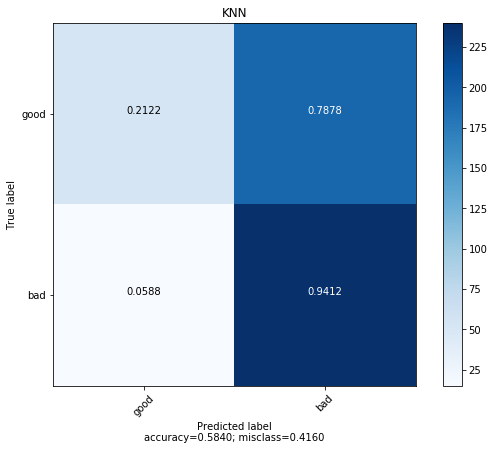

In [101]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - NN using TF-IDF

In [102]:
from sklearn.neural_network import MLPClassifier
name = "NN"
nb = MLPClassifier(alpha=1)

In [103]:
result = %timeit -r 1 -n 1 -o nb.fit(polarity_IDF_train_dtm, polarity_train_Y)
fit_dur=result.average

2min 50s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [104]:
result = %timeit -r 1 -n 1 -o nb.predict(polarity_IDF_test_dtm)
y_pred_class = nb.predict(polarity_IDF_test_dtm)
predict_dur=result.average

23.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [105]:
# calculate accuracy of class predictions
from sklearn import metrics
compute_model_perf(polarity_mperf_accu_idf,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 170.64819333400004,
 'predict_duration': 0.02379764500000192,
 'accuracy': 0.844,
 'recall': 0.9137254901960784}

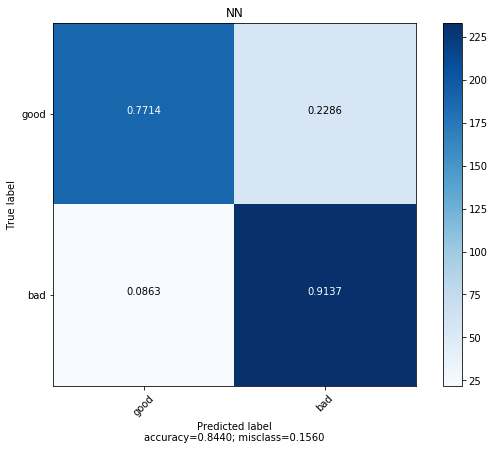

In [106]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

####  sklearn Logisitic Regression using TF-IDF

In [239]:
# import and instantiate a logistic regression model 
from sklearn.linear_model import LogisticRegression
name = "LogisticRegression"
logreg = LogisticRegression()

In [240]:
result = %timeit -r 1 -n 1 -o logreg.fit(polarity_IDF_train_dtm, polarity_train_Y)
fit_dur=result.average

75.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [241]:
result = %timeit -r 1 -n 1 -o y_pred_class = logreg.predict(polarity_IDF_test_dtm)
predict_dur=result.average

912 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [242]:
y_pred_prob = logreg.predict_proba(polarity_IDF_test_dtm)[:, 1]
y_pred_prob[:20]

array([0.64784627, 0.47568784, 0.40027116, 0.44721712, 0.38290936,
       0.35141289, 0.70536211, 0.56466361, 0.32218966, 0.61096623,
       0.30309784, 0.42377814, 0.51852486, 0.35723469, 0.76344955,
       0.42139232, 0.49740505, 0.48134474, 0.6049958 , 0.3466669 ])

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.78')

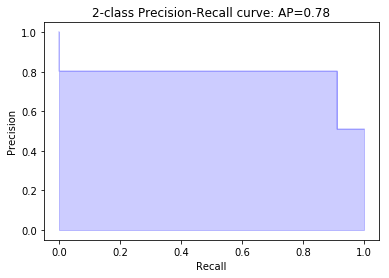

In [111]:
# calculate accuracy
average_precision = metrics.average_precision_score(polarity_test_Y, y_pred_class)
precision, recall, _ = metrics.precision_recall_curve(polarity_test_Y, y_pred_class)
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [112]:
compute_model_perf(polarity_mperf_accu_idf,polarity_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 0.06570529499998656,
 'predict_duration': 0.0011588059999780853,
 'accuracy': 0.844,
 'recall': 0.9137254901960784}

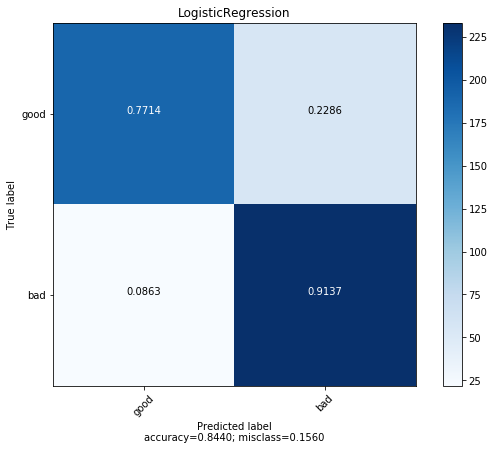

In [113]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(polarity_test_Y, y_pred_class),['good','bad'],name)

In [114]:
# calculate AUC
metrics.roc_auc_score(polarity_test_Y, y_pred_prob)

0.9077871148459384

#### Lexicon Normalization
##### Stemming ("racinisation")
Stemming is the process for reducing inflected (or sometimes derived) words to their stem, base or root form—generally a written word form. 

##### Lemmatizing
Lemmatization reduces words to their base word, which is linguistically correct lemmas (canonical form for unit of meaning).

##### POS (Part of speech) tagging

#### Now using pipelines to combine methods

> In order to make the vectorizer => transformer => classifier easier to work with, scikit-learn provides a Pipeline class that behaves like a compound classifier:

,MultinomialNB,Perceptron,RandomForestClassifier,AdaBoostClassifier,LinearSVM,SVM,KNN,NN,LogisticRegression
accuracy,0.810000,0.832000,0.754000,0.782000,0.844000,0.490000,0.630000,0.852000,0.852000
fit_duration,0.007883,0.029966,0.132379,1.142169,5.090613,6.070232,0.002836,83.044325,0.392695
predict_duration,0.001783,0.001245,0.018702,0.044731,1.155148,1.964415,0.193663,0.020705,0.001386
recall,0.796078,0.937255,0.717647,0.792157,0.827451,0.000000,0.611765,0.854902,0.854902


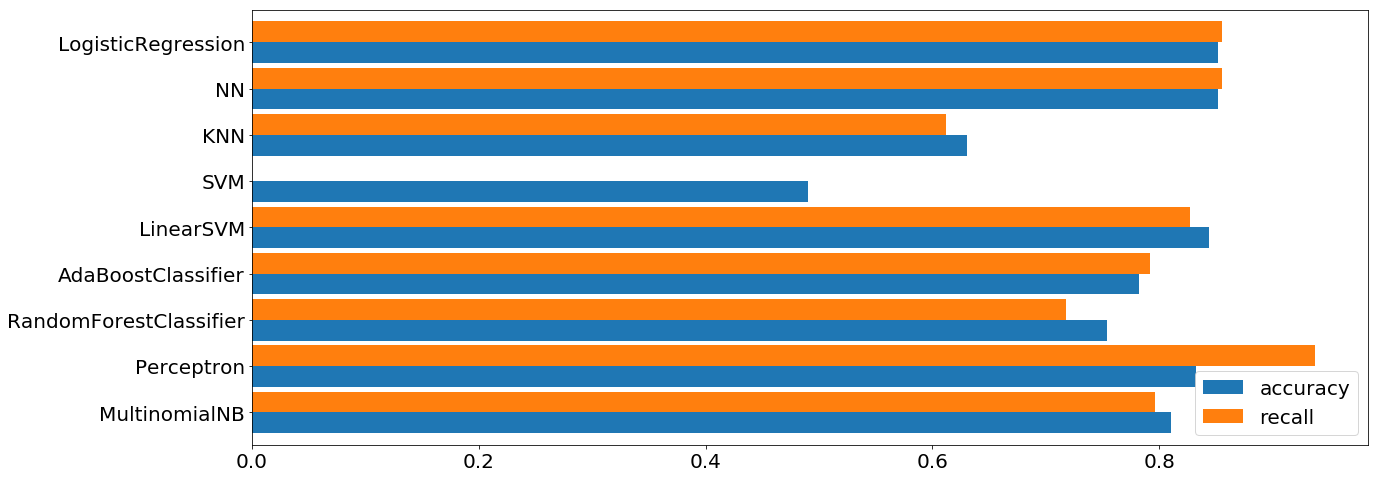

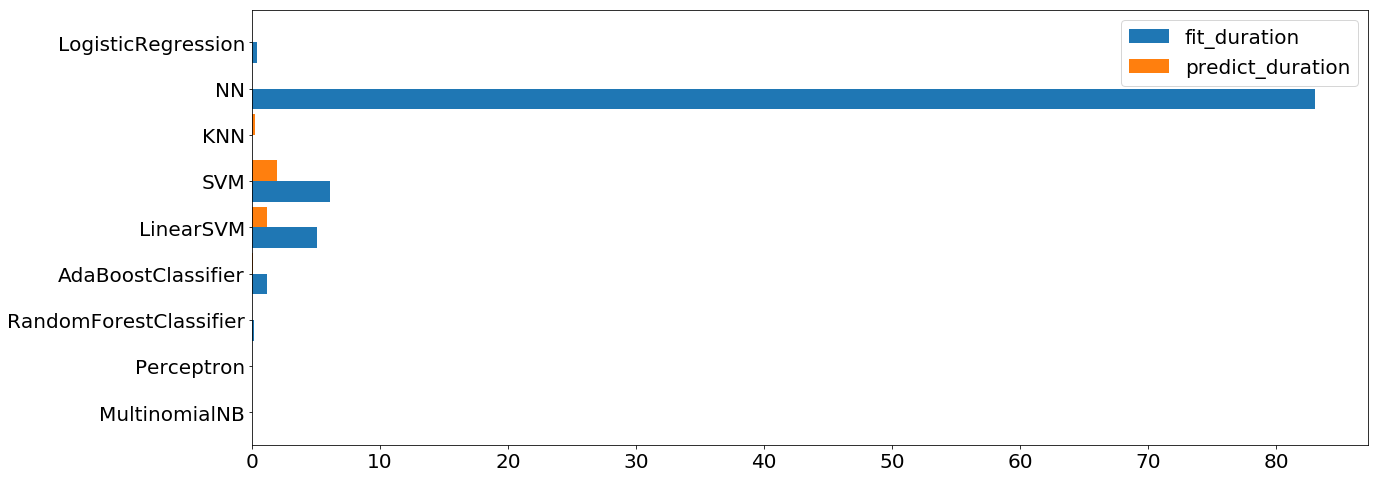

In [187]:
df = pd.DataFrame(polarity_mperf_accu_cv)
#df["type"]=df.index
#df.melt(id_vars="type")
df.T[['accuracy', 'recall']].plot.barh(rot=0,figsize=(20,8),fontsize=20, width=0.9,logx=False)
df.T[['fit_duration', 'predict_duration']].plot.barh(rot=0,figsize=(20,8),fontsize=20, width=0.9,logx=False)
df

,MultinomialNB,Perceptron,RandomForestClassifier,AdaBoostClassifier,LinearSVM,SVM,KNN,NN,LogisticRegression
accuracy,0.804000,0.850000,0.710000,0.768000,0.490000,0.694000,0.584000,0.844000,0.844000
fit_duration,0.008505,0.017207,0.162514,2.570084,6.174848,6.130353,0.003970,170.648193,0.065705
predict_duration,0.002058,0.001181,0.023041,0.046062,2.034849,1.958369,0.163546,0.023798,0.001159
recall,0.729412,0.870588,0.658824,0.760784,0.000000,0.537255,0.941176,0.913725,0.913725


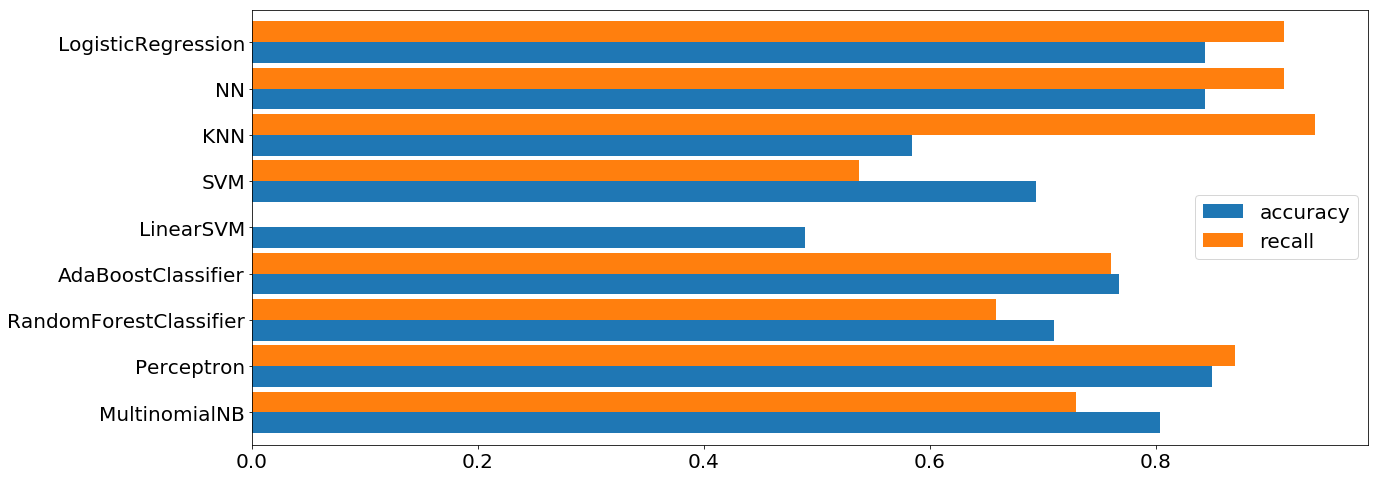

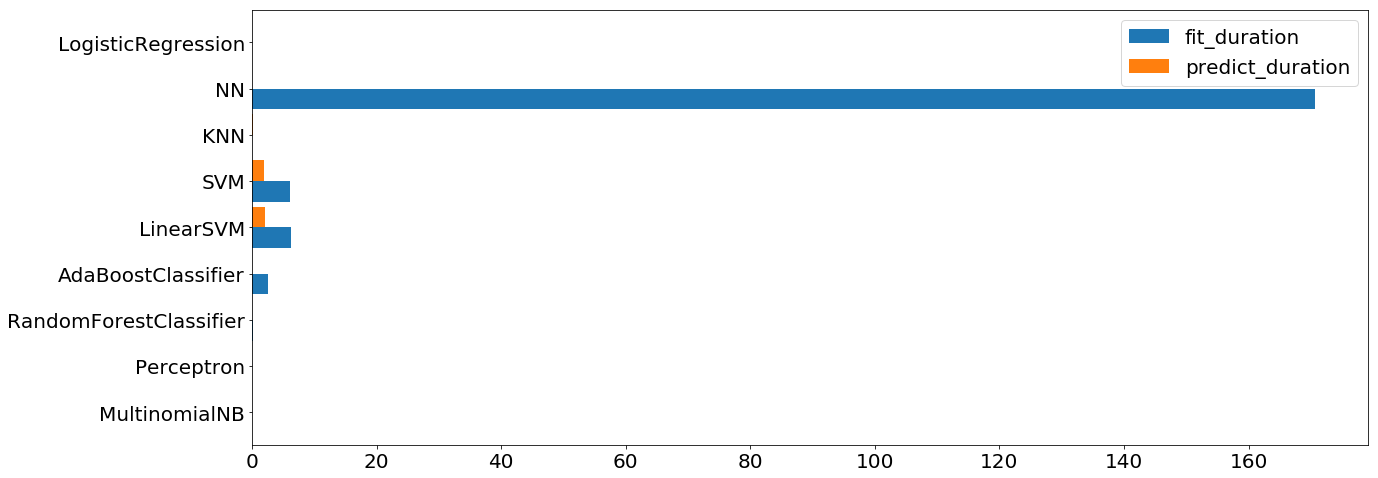

In [185]:
df1 = pd.DataFrame(polarity_mperf_accu_idf)
#df["type"]=df.index
#df.melt(id_vars="type")
df1.T[['accuracy', 'recall']].plot.barh(rot=0,figsize=(20,8),fontsize=20, width=0.9,logx=False)
df1.T[['fit_duration', 'predict_duration']].plot.barh(rot=0,figsize=(20,8),fontsize=20, width=0.9,logx=False)
df1

,MultinomialNB,Perceptron,RandomForestClassifier,AdaBoostClassifier,LinearSVM,SVM,KNN,NN,LogisticRegression
accuracy,0.006000,-0.018000,0.044000,0.014000,0.354000,-0.204000,0.046000,0.008000,0.008000
fit_duration,-0.000621,0.012759,-0.030134,-1.427914,-1.084236,-0.060121,-0.001135,-87.603869,0.326990
predict_duration,-0.000275,0.000064,-0.004339,-0.001330,-0.879701,0.006046,0.030117,-0.003093,0.000227
recall,0.066667,0.066667,0.058824,0.031373,0.827451,-0.537255,-0.329412,-0.058824,-0.058824


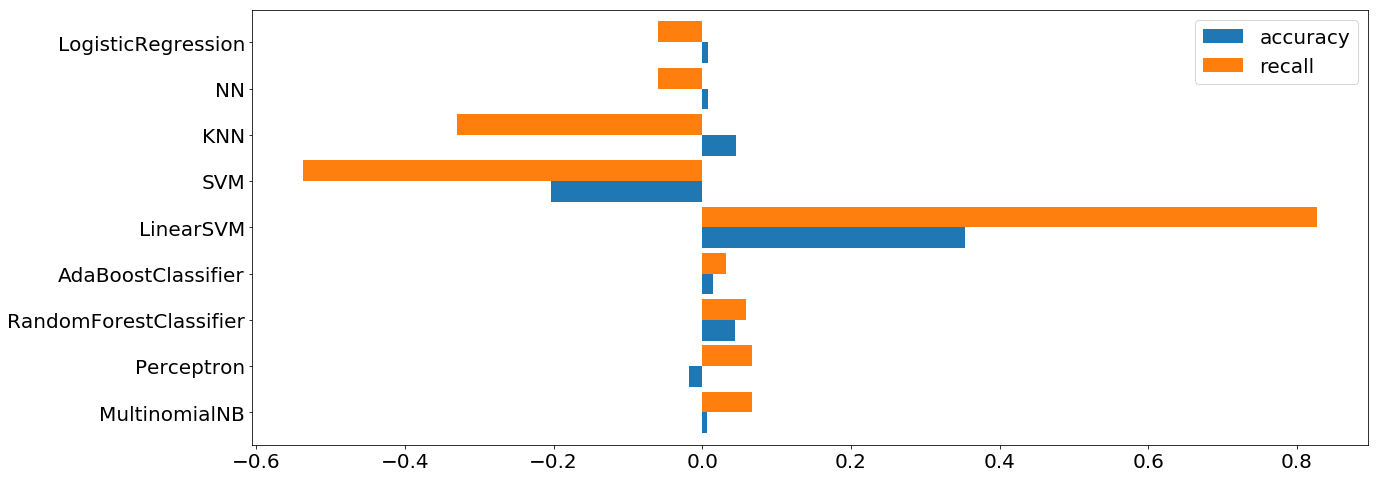

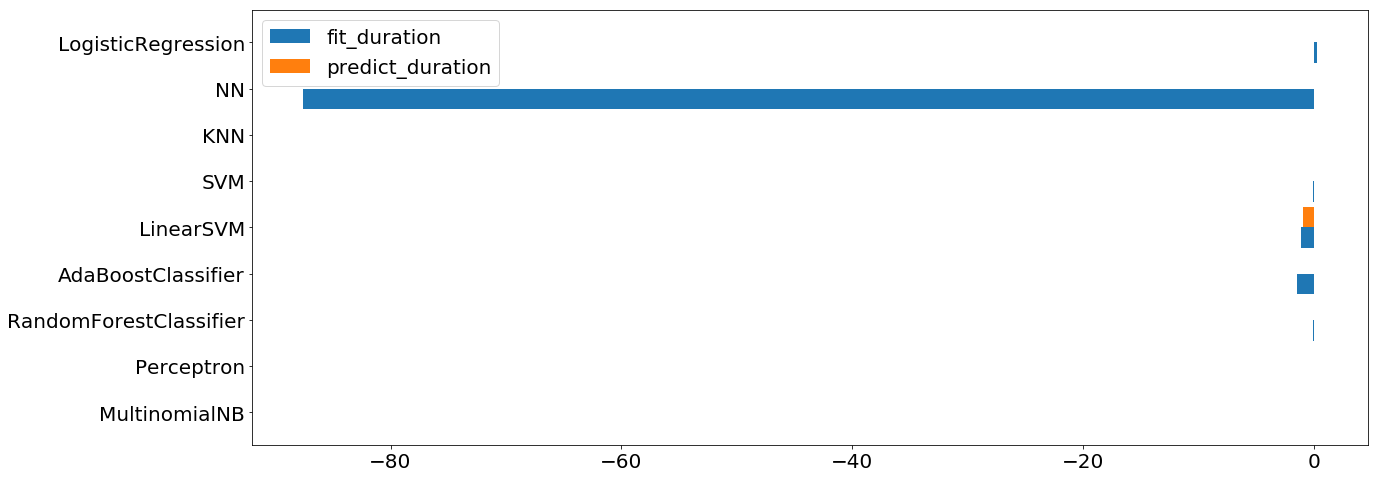

In [188]:
df2 = pd.DataFrame({k:v for k,v in polarity_mperf_accu_cv.items() if k in polarity_mperf_accu_idf.keys()}) - pd.DataFrame(polarity_mperf_accu_idf)
#df["type"]=df.index
#df.melt(id_vars="type")
df2.T[['accuracy', 'recall']].plot.barh(rot=0,figsize=(20,8),fontsize=20, width=0.9,logx=False)
df2.T[['fit_duration', 'predict_duration']].plot.barh(rot=0,figsize=(20,8),fontsize=20, width=0.9,logx=False)
df2

### acl Imdb

+ train/test
+ \[id\]_\[rating\].txt with id the id of the film and rating the rating given by this review

review -> positive/negative rating

In [117]:
from glob import glob
acl_files_train_pos = glob("data/aclImdb_v1/aclImdb/train/pos/*")
acl_files_train_neg = glob("data/aclImdb_v1/aclImdb/train/neg/*")
print("number of positives: ", len(acl_files_train_pos))
print("number of negatives: ", len(acl_files_train_neg))
acl_files_test_pos = glob("data/aclImdb_v1/aclImdb/test/pos/*")
acl_files_test_neg = glob("data/aclImdb_v1/aclImdb/test/neg/*")
print("number of positives in test: ", len(acl_files_test_pos))
print("number of negatives in test: ", len(acl_files_test_neg))
acl_files_pos = acl_files_train_pos + acl_files_test_pos
acl_files_neg = acl_files_train_neg + acl_files_test_neg

number of positives:  12500
number of negatives:  12500
number of positives in test:  12500
number of negatives in test:  12500


In [118]:
import pandas as pd
acl_files_df = pd.DataFrame({'pos':acl_files_pos,'neg':acl_files_neg})
acl_files_df = pd.melt(acl_files_df, value_vars=['pos','neg'],value_name="file",var_name="label")
acl_files_df["label_num"] = acl_files_df.label.map({"neg":0, "pos":1})
acl_files_df.sample(10)

,label,file,label_num
35403,neg,data/aclImdb_v1/aclImdb/train/neg/1032_1.txt,0
5161,pos,data/aclImdb_v1/aclImdb/train/pos/4847_9.txt,1
41257,neg,data/aclImdb_v1/aclImdb/test/neg/3440_2.txt,0
3427,pos,data/aclImdb_v1/aclImdb/train/pos/3030_9.txt,1
19871,pos,data/aclImdb_v1/aclImdb/test/pos/70_8.txt,1
45801,neg,data/aclImdb_v1/aclImdb/test/neg/8161_3.txt,0
42150,neg,data/aclImdb_v1/aclImdb/test/neg/4309_3.txt,0
8033,pos,data/aclImdb_v1/aclImdb/train/pos/7935_8.txt,1
12247,pos,data/aclImdb_v1/aclImdb/train/pos/12257_8.txt,1
22460,pos,data/aclImdb_v1/aclImdb/test/pos/9984_9.txt,1


In [119]:
# splitting into test & train
from sklearn.model_selection import train_test_split
import numpy as np
sample = acl_files_df #.sample(200)
acl_X = sample["file"]
acl_Y = sample["label_num"]
acl_train_X, acl_test_X, acl_train_Y, acl_test_Y = train_test_split(acl_X, acl_Y, random_state=1)

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=20000)
vect.fit((open(e).read() for e in acl_train_X))
acl_train_dtm = vect.transform((open(e).read() for e in acl_train_X))

In [121]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tfidf.fit(acl_train_dtm)
acl_train_dtm = tfidf.transform(acl_train_dtm)

In [122]:
#from sklearn.feature_extraction.text import HashingVectorizer
#hvect = HashingVectorizer()
#acl_train_dtm = hvect.fit((open(e).read() for e in acl_train_X))
#acl_train_dtm = hvect.transform((open(e).read() for e in acl_train_X))

#from sklearn.decomposition import MiniBatchDictionaryLearning
#nmf = MiniBatchDictionaryLearning() #(n_components=2, init='random', random_state=0)
#nmf.fit(acl_train_dtm)
#acl_train_dtm = nmf.transform(acl_train_dtm)

In [123]:
# examine the fitted vocabulary
vect.get_feature_names()[:20]

['00',
 '000',
 '007',
 '01',
 '02',
 '05',
 '06',
 '08',
 '10',
 '100',
 '1000',
 '100th',
 '101',
 '102',
 '105',
 '10th',
 '11',
 '110',
 '117',
 '11th']

In [124]:
acl_test_dtm = vect.transform((open(e).read() for e in acl_test_X))

#acl_test_dtm = hvect.transform((open(e).read() for e in acl_test_X))

acl_test_dtm = tfidf.transform(acl_test_dtm)

#acl_test_dtm = nmf.transform(acl_test_dtm)

In [125]:
acl_mperf_accu_idf = {}

#### sklearn - MultinomialNB using TF-IDF

In [126]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
name = "MultinomialNB"
nb = MultinomialNB()

In [127]:
result = %timeit -r 1 -n 1 -o nb.fit(acl_train_dtm, acl_train_Y)
fit_dur=result.average

35.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [128]:
result = %timeit -r 1 -n 1 -o nb.predict(acl_test_dtm)
predict_dur=result.average
y_pred_class = nb.predict(acl_test_dtm)
y_pred_class

12.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


array([0, 0, 1, ..., 0, 1, 0])

In [129]:
# tranformation into a boolean array
print(y_pred_class==1)

[False False  True ... False  True False]


In [130]:
# some film predicted as good
pd.DataFrame(acl_test_X[y_pred_class==1]).sample(20)

,file
19621,data/aclImdb_v1/aclImdb/test/pos/682_9.txt
19360,data/aclImdb_v1/aclImdb/test/pos/6562_8.txt
1264,data/aclImdb_v1/aclImdb/train/pos/9881_8.txt
16773,data/aclImdb_v1/aclImdb/test/pos/3988_7.txt
10613,data/aclImdb_v1/aclImdb/train/pos/10634_10.txt
5734,data/aclImdb_v1/aclImdb/train/pos/5483_10.txt
16842,data/aclImdb_v1/aclImdb/test/pos/3875_9.txt
11221,data/aclImdb_v1/aclImdb/train/pos/11284_8.txt
2124,data/aclImdb_v1/aclImdb/train/pos/176_7.txt
17330,data/aclImdb_v1/aclImdb/test/pos/4389_10.txt


In [131]:
compute_model_perf(acl_mperf_accu_idf,acl_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 0.03524996500004818,
 'predict_duration': 0.012567012000033628,
 'accuracy': 0.85848,
 'recall': 0.8443255155044861}

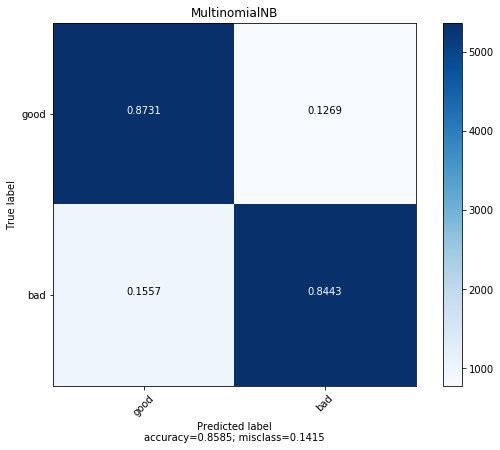

In [132]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(acl_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - PassiveAggressive using TF-IDF

In [133]:
from sklearn.linear_model import PassiveAggressiveClassifier
name = "PassiveAggressive"
nb = PassiveAggressiveClassifier(random_state=0)

In [134]:
result = %timeit -r 1 -n 1 -o nb.fit(acl_train_dtm, acl_train_Y)
fit_dur=result.average

145 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


/usr/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [135]:
result = %timeit -r 1 -n 1 -o nb.predict(acl_test_dtm)
predict_dur=result.average
y_pred_class = nb.predict(acl_test_dtm)
y_pred_class

5.61 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


array([0, 1, 0, ..., 0, 1, 0])

In [136]:
# tranformation into a boolean array
print(y_pred_class==1)

[False  True False ... False  True False]


In [137]:
# some film predicted as good
pd.DataFrame(acl_test_X[y_pred_class==1]).sample(20)

,file
34919,data/aclImdb_v1/aclImdb/train/neg/9775_4.txt
192,data/aclImdb_v1/aclImdb/train/pos/2217_7.txt
4318,data/aclImdb_v1/aclImdb/train/pos/3888_10.txt
15560,data/aclImdb_v1/aclImdb/test/pos/2642_8.txt
15324,data/aclImdb_v1/aclImdb/test/pos/237_8.txt
13909,data/aclImdb_v1/aclImdb/test/pos/11424_8.txt
9060,data/aclImdb_v1/aclImdb/train/pos/8907_8.txt
14151,data/aclImdb_v1/aclImdb/test/pos/12382_9.txt
2516,data/aclImdb_v1/aclImdb/train/pos/2117_10.txt
15449,data/aclImdb_v1/aclImdb/test/pos/2495_7.txt


In [138]:
compute_model_perf(acl_mperf_accu_idf,acl_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 0.14502837800000634,
 'predict_duration': 0.005611222000027283,
 'accuracy': 0.88656,
 'recall': 0.8830473791909335}

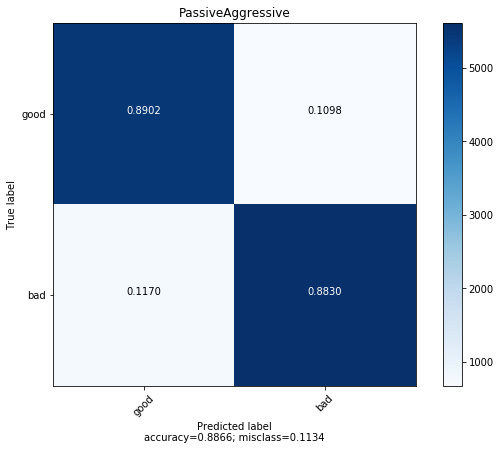

In [139]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(acl_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - PassiveAggressive using TF-IDF

In [140]:
from sklearn.linear_model import Perceptron
name = "Perceptron"
nb = Perceptron(tol=1e-3)

In [141]:
result = %timeit -r 1 -n 1 -o nb.fit(acl_train_dtm, acl_train_Y)
fit_dur=result.average

259 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [142]:
result = %timeit -r 1 -n 1 -o nb.predict(acl_test_dtm)
predict_dur=result.average
y_pred_class = nb.predict(acl_test_dtm)
y_pred_class

6.53 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


array([0, 1, 0, ..., 0, 1, 0])

In [143]:
# tranformation into a boolean array
print(y_pred_class==1)

[False  True False ... False  True False]


In [144]:
# some film predicted as good
pd.DataFrame(acl_test_X[y_pred_class==1]).sample(20)

,file
21713,data/aclImdb_v1/aclImdb/test/pos/8990_8.txt
5809,data/aclImdb_v1/aclImdb/train/pos/5607_7.txt
21797,data/aclImdb_v1/aclImdb/test/pos/9196_8.txt
13763,data/aclImdb_v1/aclImdb/test/pos/9880_8.txt
38029,data/aclImdb_v1/aclImdb/test/neg/490_2.txt
9898,data/aclImdb_v1/aclImdb/train/pos/9789_10.txt
4540,data/aclImdb_v1/aclImdb/train/pos/4025_9.txt
15015,data/aclImdb_v1/aclImdb/test/pos/2115_10.txt
12116,data/aclImdb_v1/aclImdb/train/pos/12117_7.txt
31691,data/aclImdb_v1/aclImdb/train/neg/6473_3.txt


In [145]:
compute_model_perf(acl_mperf_accu_idf,acl_test_Y, y_pred_class,name,fit_dur,predict_dur)

{'fit_duration': 0.2593243530000109,
 'predict_duration': 0.006533379000018158,
 'accuracy': 0.86776,
 'recall': 0.8981583503856446}

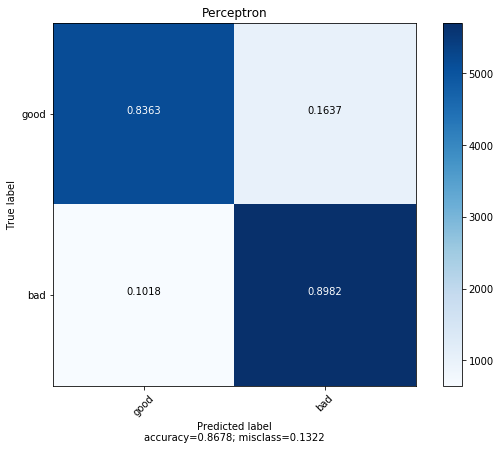

In [146]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(acl_test_Y, y_pred_class),['good','bad'],name)

#### sklearn - KNN using CountVectorizer

In [147]:
from sklearn.neighbors import KNeighborsClassifier
nb = KNeighborsClassifier(3)

In [148]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(acl_train_dtm, acl_train_Y)

CPU times: user 29.7 ms, sys: 0 ns, total: 29.7 ms
Wall time: 28.7 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [149]:
y_pred_class=nb.predict(acl_test_dtm)

In [150]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(acl_test_Y, y_pred_class)

0.75096

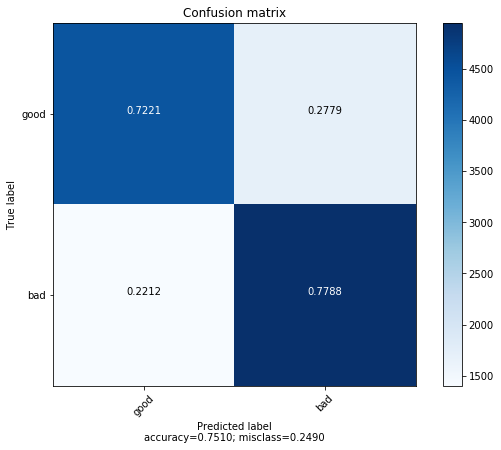

In [151]:
# print the confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(acl_test_Y, y_pred_class),['good','bad'])

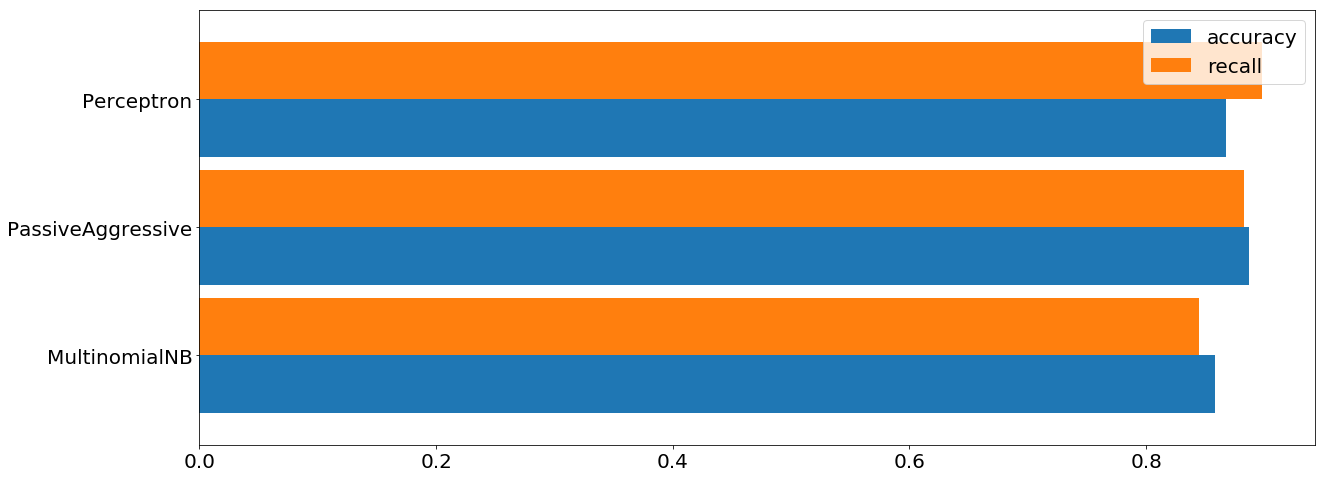

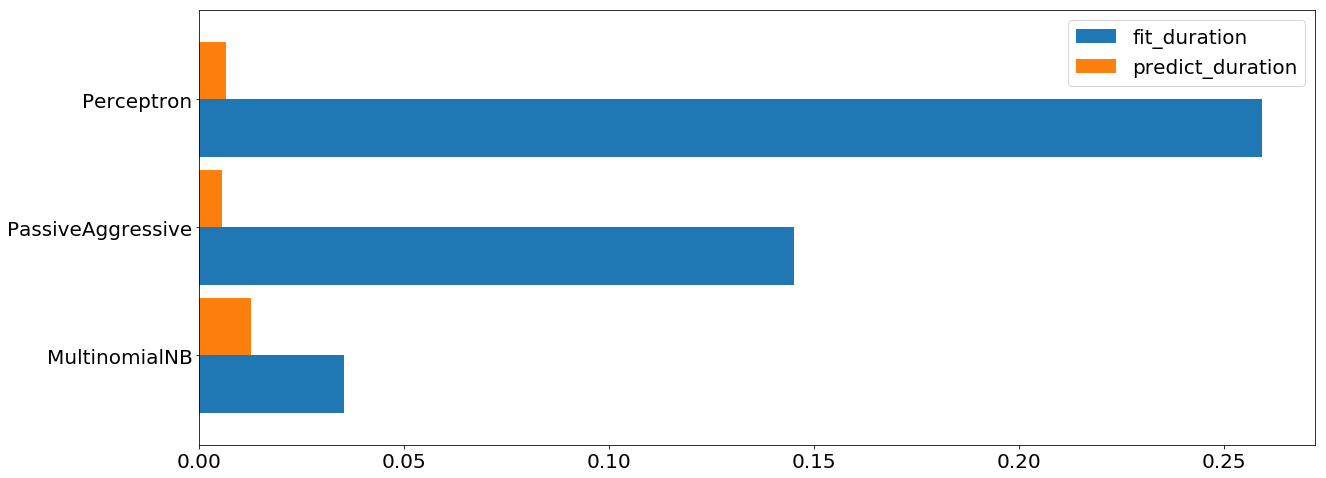

In [152]:
df = pd.DataFrame(acl_mperf_accu_idf)
#df["type"]=df.index
#df.melt(id_vars="type")
df.T[['accuracy', 'recall']].plot.barh(rot=0,figsize=(20,8),fontsize=20, width=0.9,logx=False)
df.T[['fit_duration', 'predict_duration']].plot.barh(rot=0,figsize=(20,8),fontsize=20, width=0.9,logx=False)